In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [25]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes.csv")

In [26]:
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Features and target**

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

**Split dataset into train and test sets :** Train-test split: 80% train and 20% test data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Define models and their hyperparameters to tune**

In [31]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
            'solver': ['liblinear', 'saga']  # Solvers
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}  # No hyperparameters to tune for Naive Bayes
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    }
}

**Tune models using GridSearchCV**

In [34]:
results = {}
for name, config in models.items():
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'Best Model': best_model,
        'Accuracy': accuracy,
        'Best Params': clf.best_params_
    }

**Display results**

In [35]:
print("Model Tuning Results:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Best Params: {result['Best Params']}")

Model Tuning Results:

Logistic Regression:
Accuracy: 0.7597
Best Params: {'C': 10, 'solver': 'liblinear'}

Random Forest:
Accuracy: 0.7338
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

SVM:
Accuracy: 0.7532
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

K-Nearest Neighbors:
Accuracy: 0.7143
Best Params: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

Naive Bayes:
Accuracy: 0.7662
Best Params: {}

Decision Tree:
Accuracy: 0.7597
Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


**Find the best model**

In [41]:
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = results[best_model_name]['Best Model']
best_accuracy = results[best_model_name]['Accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Parameters: {results[best_model_name]['Best Params']}")


Best Model: Naive Bayes
Accuracy: 0.7662
Parameters: {}

Best Model: Naive Bayes
Accuracy: 0.7662
Parameters: {}


**Visualize results in a bar plot**

In [36]:
model_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in model_names]

<ipython-input-37-2aca2341dcb0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


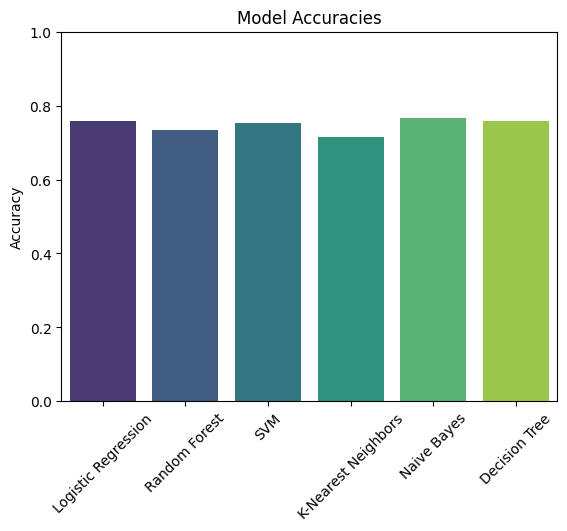

In [37]:
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

** Use the best model for prediction**

In [42]:
print("\nUsing the best model for prediction:")


Using the best model for prediction:


**Predict for a new sample**

In [44]:
sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Example input
prediction = best_model.predict(sample_data)
prediction_label = "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

print(f"Input Data: {sample_data}")
print(f"Prediction: {prediction_label}")

Input Data: [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
Prediction: Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
